In [32]:
"""author: sarah konrad, data+ 2023
use this code to get kmeans clusters on a corpus! kmeans is preferable to lda topic modeling
in certain instances per dr. giugni's rec
"""
from collections import defaultdict, Counter
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def gettexts(folder):
    texts = []
    #list of lists of strings, each text broken up into individual token strings
    tokenized = []
    #list of texts as a continuous string
    textnames = []
    for file in os.listdir(folder):
        path = os.path.join(folder,file)
        name = os.path.basename(file)
        f = open(path,'r', encoding="utf-8")
        data = f.read()
        textnames.append(name)
        texts.append(data)
        f.close()
    for text in texts:
        #tokenize by white space
        words = text.strip().split(' ')
        tokenized.append(words)
    return [tokenized, texts, textnames]

#the output wanted, according to earlyprint, is texts with their spaces still intact, idk why
all_texts = gettexts('/hpc/group/datap2023ecbc/supervised_class_NotAccurate')

tfidf = TfidfVectorizer(min_df=2, sublinear_tf=True)
result = tfidf.fit_transform(all_texts[1])
#readable_results = pd.DataFrame(result.toarray(), index=all_texts, columns=tfidf.get_feature_names_out) # Convert information back to a DataFrame

#create kmeans instance that has a specified number of topics ie. 10 
#kmeans = KMeans(n_clusters=2, random_state=42) 
true_k = 4
kmeans = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=30)
kmeans.fit(result)

#which texts got grouped together
kmeans_groups = defaultdict(list)
for key,value in zip(kmeans.labels_,[name.split('.')[0] for name in all_texts[2]]):
    kmeans_groups[key].append(value)
    
#for value in kmeans_groups.values():
   #print(value)


In [33]:
def get_top_terms(kmeans):
    print("Top terms per cluster:")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = tfidf.get_feature_names_out()
    for i in range(true_k):
        print("Cluster %d:" % i),
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind])
get_top_terms(kmeans)

Top terms per cluster:
Cluster 0:
 tobacco
 proclamation
 royal
 realm
 plantation
 command
 import
 ireland
 take
 king
Cluster 1:
 religion
 church
 world
 prince
 king
 pope
 speak
 christ
 father
 god
Cluster 2:
 good
 king
 majesty
 person
 give
 subject
 god
 country
 virginia
 lord
Cluster 3:
 take
 good
 give
 captain
 leave
 enemy
 find
 country
 ship
 bring


<Axes: xlabel='pc1', ylabel='pc2'>

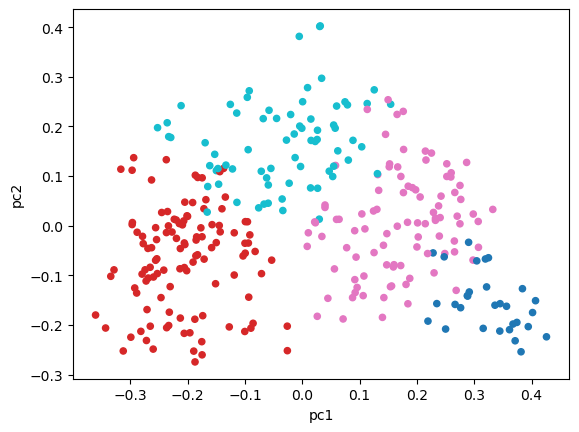

In [34]:
#pca plotting! this enables us to see how distinct clusters are
readable_results = pd.DataFrame(result.toarray(), index=all_texts[2], columns=tfidf.get_feature_names_out())
pca = PCA(n_components=2)
pca_results = pca.fit_transform(readable_results)

#transform it to a dataframe
pca_df = pd.DataFrame(pca_results, index=all_texts[2], columns=["pc1","pc2"])

#make pretty to look at
pca_df['color'] = pd.Series(kmeans.labels_, index=all_texts[2])
pca_df.plot.scatter(x='pc1', y='pc2', c='color', colormap='tab10', colorbar=False)

#damn these clusters are not distinct at all...

<Axes: xlabel='pc1', ylabel='pc2'>

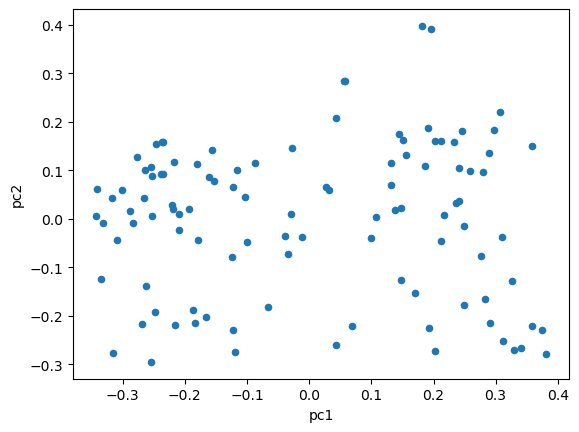

In [22]:
pca_df.plot.scatter(x='pc1', y='pc2')
